In [20]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
from pdb import set_trace
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pdb import set_trace

In [206]:
def GenerateData():
    width = 64
    height = 64
    FPS = 1000
    seconds = 10
    radius = 1
    paint_h = int(height/2)
    VideoData = []

    #Design the testing data
    for paint_x in range(-radius, width+radius+1, 1):
        frame = 255*np.ones( 
                       (height, width), 
                                  dtype=np.double)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
        VideoData.append(frame)

    VideoTrain = np.stack(VideoData, axis=0)

    for paint_x in range(-radius, width+radius+1, 2):
        frame = 255*np.ones( 
                       (height, width), 
                                  dtype=np.double)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
        VideoData.append(frame)

    VideoTest = np.stack(VideoData, axis=0)

    return torch.tensor(VideoTrain,dtype=torch.float), torch.tensor(VideoTest,dtype=torch.float)

67
101
5
tensor([0., 0., 0., 0., 0.])


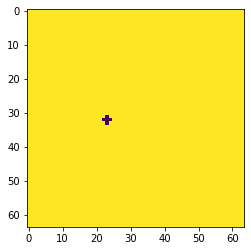

In [214]:
VideoTrain, VideoTest = GenerateData()
index = 50
print(VideoTrain.shape[0])
print(VideoTest.shape[0])
print(len(VideoTrain[index,VideoTrain[index]==0]))
print(VideoTrain[index,VideoTrain[index,:,:]==0])
plt.imshow(VideoTrain[24,:,:])
plt.show()

In [233]:
#Define the architecture for the RNN
class RNN(nn.Module):
    def __init__(self, dt, height, width):
        super(RNN, self).__init__()
        self.dt = dt
        self.height = height
        self.width = width
        self.W = nn.Parameter(torch.zeros(height, width))
        self.b = nn.Parameter(torch.zeros(height, width))
        
    def forward(self,X):
        # Make the dynamics here
        # Extract the image of the object
        # Define the parameters for the new position
        # Predict the object there
        frames = X.shape[0]-1
        output = []
        for i in range(frames):
            #Extract the indices of the object
            param = torch.matmul(self.W, X[i]) + self.b
            newframe = X[i] + self.dt*param
            output.append(newframe)
           
        return torch.stack(output, axis=0)

In [245]:
rnn = RNN(1/24, 64,64)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)
n_epochs = 10000

In [246]:
Truedat = VideoTrain[1:]
delay = 5
for i in range(n_epochs):
    output = rnn(VideoTrain)
    loss = torch.mean(torch.square(output - Truedat))
    if (i%delay == 0):
        print(loss.item())
    loss.backward()
    optimizer.step()

92.12451934814453
96.90129089355469
95.07168579101562
114.28192901611328
94.16016387939453
157.4188690185547
215.71649169921875
153.91014099121094
121.17291259765625
248.1483154296875
490.4979248046875
601.94384765625
500.4676818847656
313.4598083496094
227.36671447753906
382.5022277832031
782.6912841796875
1288.0869140625
1636.964111328125
1642.948974609375
1378.9161376953125
1003.1019287109375
665.8369140625
532.8128662109375
715.5053100585938
1224.677734375
1976.11083984375
2804.7451171875
3490.314697265625
3828.140625
3739.510009765625
3310.654296875
2701.52978515625
2056.696533203125
1503.1685791015625
1166.89599609375
1151.3892822265625
1505.523193359375
2212.555419921875
3196.427978515625
4333.06787109375
5463.54736328125
6413.57373046875
7025.341796875
7200.17626953125
6932.05859375
6305.0234375
5452.01904296875
4508.537109375
3591.820556640625
2804.128173828125
2239.51171875
1979.35400390625
2079.38818359375
2558.603515625
3395.756591796875
4532.328125
5878.7265625
7321.602050

34822.203125
32555.712890625
30417.1328125
28420.1015625
26577.455078125
24900.787109375
23400.80078125
22087.10546875
20968.294921875
20051.703125
19343.46875
18848.64453125
18570.904296875
18512.712890625
18675.2109375
19058.1875
19659.978515625
20477.755859375
21507.05859375
22742.298828125
24176.35546875
25800.8828125
27606.27734375
29581.609375
31714.875
33992.94140625
36401.66796875
38925.8125
41549.34375
44255.84375
47027.6875
49847.01171875
52695.25
55554.01953125
58404.3203125
61227.14453125
64003.63671875
66714.9140625
69342.578125
71868.546875
74275.4609375
76546.484375
78665.8203125
80618.4140625
82390.1953125
83969.0625
85343.0625
86502.59375
87439.1953125
88146.1796875
88618.640625
88853.3515625
88848.578125
88604.859375
88124.6328125
87411.546875
86471.8359375
85312.7265625
83943.7421875
82375.578125
80620.1640625
78691.3359375
76603.359375
74372.125
72014.1328125
69546.140625
66986.0
64351.4453125
61660.703125
58931.71875
56182.55078125
53430.9296875
50694.3125
47989.59

121303.3359375
122777.359375
124084.8515625
125220.375
126179.4375
126958.1796875
127553.5625
127962.8359375
128184.3046875
128217.4375
128061.8515625
127718.3203125
127188.4375
126474.515625
125579.2109375
124506.8359375
123261.7890625
121849.234375
120275.28125
118546.671875
116670.2734375
114654.4609375
112507.03125
110237.0625
107853.6640625
105366.625
102785.515625
100120.90625
97383.0625
94582.390625
91729.6875
88835.34375
85910.3671875
82965.3125
80010.6484375
77057.0625
74114.453125


KeyboardInterrupt: 

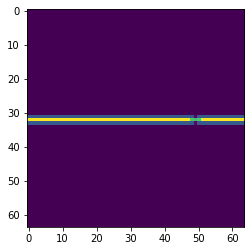

In [244]:
plt.imshow(output[50].detach().numpy())